#### This is an initial data visulization/cleaning of the SWAT dataset.
#### * The Timestamp was used for indexing
#### * The features with unique values were removed
#### * The spaces in column names were removed
#### * The labels with typos were corrected
#### * The features with correlation>95% were removed

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
#set index to Timestamp column
df = pd.read_csv("SWAT.csv", parse_dates = True, index_col = 0)


In [165]:
df.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [166]:
len(df)

449919

In [167]:
df.columns

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack'],
      dtype='object')

In [168]:
df.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [169]:
df[df.duplicated()==True]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:01:09,2.561253,523.8281,2,2,1,262.0161,8.391951,328.3517,2.441419,2,...,2,1,251.5060,1.649953,190.1436,0.000128,1,1,1,Normal
2015-12-28 10:02:19,2.668225,526.2617,2,2,1,262.1443,8.391630,328.4286,2.439881,2,...,2,1,251.0734,1.665972,189.7751,0.000128,1,1,1,Normal
2015-12-28 10:03:31,2.454280,525.7907,2,2,1,262.0802,8.394835,328.2748,2.442828,2,...,2,1,251.0254,1.698010,189.7590,0.000128,1,1,1,Normal
2015-12-28 10:04:40,2.471575,528.4599,2,2,1,262.0802,8.391310,328.2492,2.439881,2,...,2,1,250.8972,1.649953,189.6629,0.000128,1,1,1,Normal
2015-12-28 10:05:53,2.577907,529.2057,2,2,1,262.0482,8.391951,328.3004,2.439496,2,...,2,1,250.7850,1.617916,189.4546,0.000128,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-01 14:57:49,2.475098,518.9999,2,2,1,168.0979,8.635159,302.1533,2.462948,2,...,2,1,250.9613,0.897062,188.7657,0.000000,1,1,1,Normal
2016-02-01 14:58:21,2.433462,517.5476,2,2,1,168.0979,8.640925,301.9995,2.459488,2,...,2,1,250.9933,0.897062,188.7337,0.000000,1,1,1,Normal
2016-02-01 14:58:23,2.519297,517.2336,2,2,1,168.0979,8.637722,301.9995,2.457694,2,...,2,1,250.9933,0.945119,188.7337,0.000000,1,1,1,Normal


In [143]:
#percentages of missing values
df.isnull().sum()/len(df)*100

FIT101           0.0
LIT101           0.0
 MV101           0.0
P101             0.0
P102             0.0
 AIT201          0.0
AIT202           0.0
AIT203           0.0
FIT201           0.0
 MV201           0.0
 P201            0.0
 P202            0.0
P203             0.0
 P204            0.0
P205             0.0
P206             0.0
DPIT301          0.0
FIT301           0.0
LIT301           0.0
MV301            0.0
MV302            0.0
 MV303           0.0
MV304            0.0
P301             0.0
P302             0.0
AIT401           0.0
AIT402           0.0
FIT401           0.0
LIT401           0.0
P401             0.0
P402             0.0
P403             0.0
P404             0.0
UV401            0.0
AIT501           0.0
AIT502           0.0
AIT503           0.0
AIT504           0.0
FIT501           0.0
FIT502           0.0
FIT503           0.0
FIT504           0.0
P501             0.0
P502             0.0
PIT501           0.0
PIT502           0.0
PIT503           0.0
FIT601       

In [170]:
#P202, P301,P401,P404,P502,P601,P603 have a unique value so those features can be removed as they won't have any impact
df.nunique()

FIT101            2788
LIT101            9843
 MV101               3
P101                 2
P102                 2
 AIT201           2137
AIT202             965
AIT203            2584
FIT201            3144
 MV201               3
 P201                2
 P202                1
P203                 2
 P204                2
P205                 2
P206                 2
DPIT301           4478
FIT301            5638
LIT301            7274
MV301                3
MV302                3
 MV303               3
MV304                3
P301                 1
P302                 2
AIT401              17
AIT402            3166
FIT401             590
LIT401           12772
P401                 1
P402                 2
P403                 2
P404                 1
UV401                2
AIT501            1578
AIT502            2721
AIT503            1123
AIT504             331
FIT501             670
FIT502            1199
FIT503             313
FIT504             217
P501                 2
P502       

In [171]:
#column names contain spaces, remove them
df.columns=df.columns.str.strip()

In [172]:
df.drop(['P202', 'P301','P401','P404','P502','P601','P603'], axis=1, inplace=True)

In [173]:
df["Normal/Attack"].value_counts()

Normal     395298
Attack      54584
A ttack        37
Name: Normal/Attack, dtype: int64

In [174]:
df["Normal/Attack"]=df["Normal/Attack"].replace("A ttack", "Attack")

In [175]:
df["Normal/Attack"].value_counts()

Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

In [199]:
# Around 87% of the data is labeled normal and only 12% is attack
df["Normal/Attack"].value_counts()*100/len(df)

Normal    87.859815
Attack    12.140185
Name: Normal/Attack, dtype: float64

C:\Users\zeine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='PIT502'>

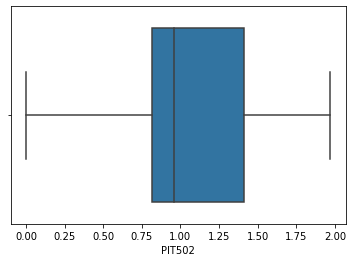

In [176]:
sns.boxplot(df["PIT502"])

C:\Users\zeine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='LIT401'>

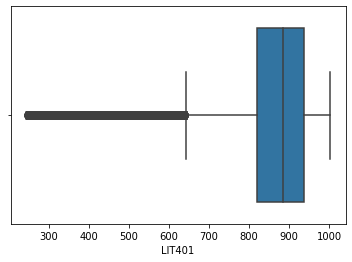

In [177]:
sns.boxplot(df["LIT401"])

<AxesSubplot: xlabel='LIT401', ylabel='Count'>

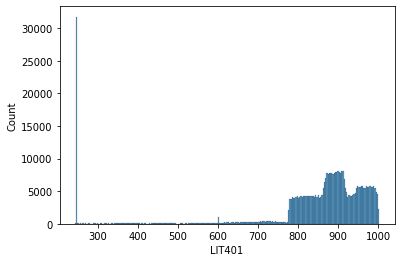

In [179]:
sns.histplot(df["LIT401"])

<AxesSubplot: xlabel='PIT502', ylabel='Count'>

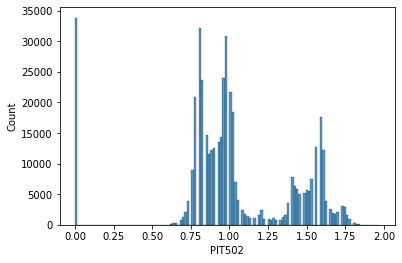

In [180]:
sns.histplot(df["PIT502"])


Text(0.5, 1.0, 'Correlation Heatmap')

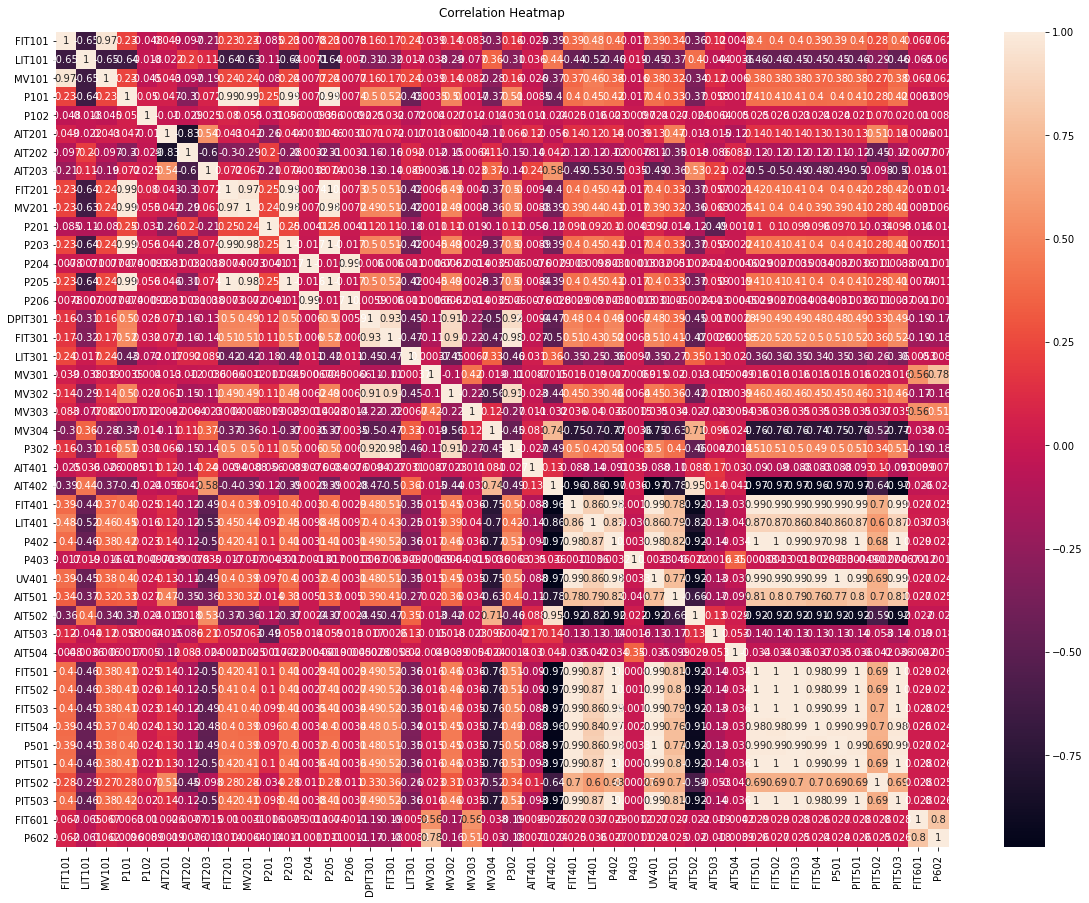

In [182]:
plt.subplots(figsize=(20,15))
corr_matrix = df.corr()
heatmap = sns.heatmap(corr_matrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15)

In [184]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

<ipython-input-184-143a6444e4a7>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


array([<AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <AxesSubplot: xlabel=' Timestamp'>,
       <Axe

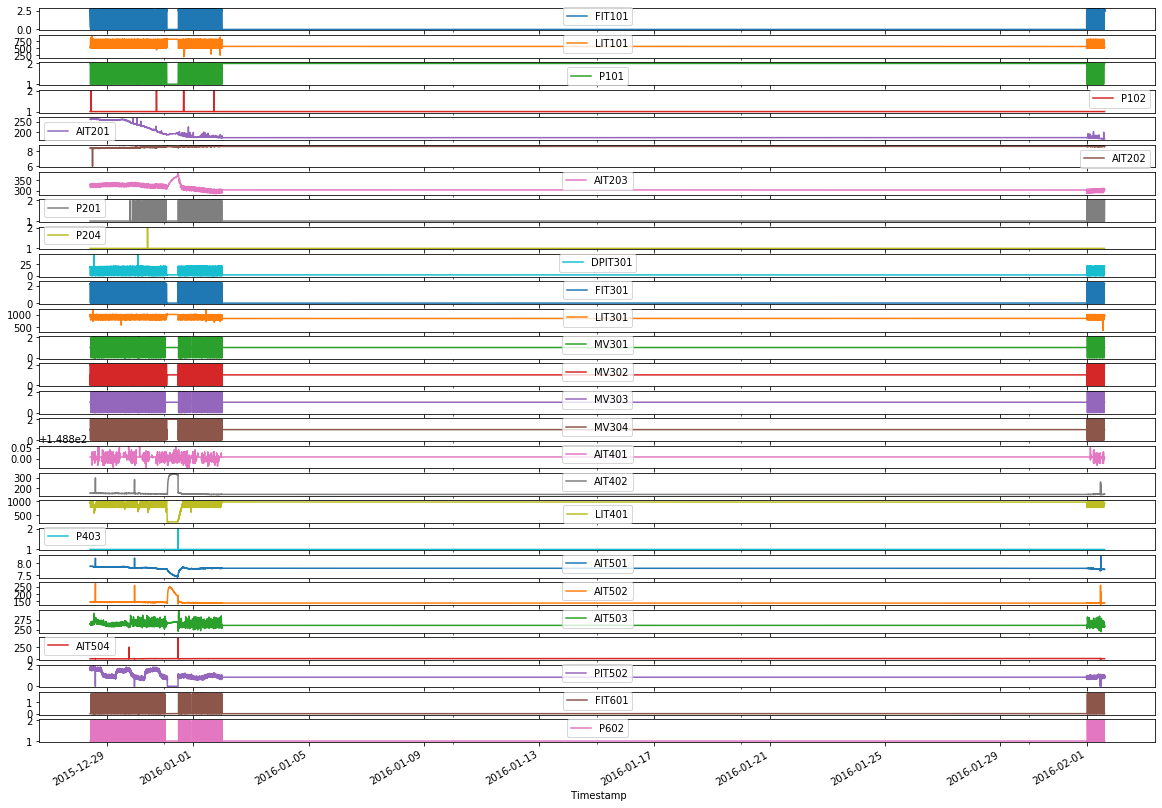

In [186]:
df.plot(subplots=True, figsize=(20, 15))

In [206]:
#number of records per year

def func(date):
    return date.year

df.groupby(func).size()

2015    309519
2016    140400
dtype: int64

In [207]:
#number of records per month

def func(date):
    return date.month

df.groupby(func).size()

1      86400
2      54000
12    309519
dtype: int64